# Classification of Human Stress Levels

Research question: What physiological factors during sleep estimate human stress levels?

Introduction: 

In today's society, especially for newer generations, it is a well known fact that daily stress is at an all time high. With gen Z facing record numbers of school shootings, student debt, joblessness, housing prices, and increased political tension, stress within the younger generations of our society is through the roof. High levels of stress left unchecked can lead to high blood pressure, heart disease, obesity, anxiety, depression etc. Our group has found a data set which relates snoring rate, heart rate, respiration rate, and body temperature while sleeping to stress levels of an individual. We want to know, how certain physiological factors can help us accurately estimate our stress levels while sleeping? We think this to be a quite important study, due to the simplicity of it, and the possibility for individuals to do at home “sleep studies” in order to predict their stress levels. The data set being used is called SayoPillow.csv, and you can see the relationship between the parameters- snoring range of the user, respiration rate, body temperature, limb movement rate, blood oxygen levels, eye movement, number of hours of sleep, heart rate and Stress Levels (0- low/normal, 1 – medium low, 2- medium, 3-medium high, 4 -high). Our group has chosen only to focus on the four variables listed above, I.E. heart rate, snoring rate, respiration rate, and body temperature. 

In [27]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)
library(GGally)
options(repr.matrix.max.rows = 6)

In [28]:
url <- "https://raw.githubusercontent.com/amasood01/SleepData--DSCI100/main/SaYoPillow.csv"
sleep_data <- read_csv(url)
sleep_data

Warning message:
“Duplicated column names deduplicated: 'sr' => 'sr_1' [7]”
Parsed with column specification:
cols(
  sr = col_double(),
  rr = col_double(),
  t = col_double(),
  lm = col_double(),
  bo = col_double(),
  rem = col_double(),
  sr_1 = col_double(),
  hr = col_double(),
  sl = col_double()
)



sr,rr,t,lm,bo,rem,sr_1,hr,sl
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
93.80,25.680,91.840,16.60,89.840,99.60,1.840,74.20,3
91.64,25.104,91.552,15.88,89.552,98.88,1.552,72.76,3
60.00,20.000,96.000,10.00,95.000,85.00,7.000,60.00,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1
73.920,21.392,93.392,11.392,91.392,91.96,4.088,63.48,2


In [29]:
sleep_data_renamed <- rename(sleep_data, 
                            snoring_rate = sr,
                            respiratory_rate = rr, 
                            body_temp = t,
                            limb_movement = lm,
                            blood_oxygen = bo,
                            eye_movement = rem,
                            sleep_hours = sr_1,
                            heart_rate = hr,
                            stress_levels = sl)
sleep_data_renamed

snoring_rate,respiratory_rate,body_temp,limb_movement,blood_oxygen,eye_movement,sleep_hours,heart_rate,stress_levels
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
93.80,25.680,91.840,16.60,89.840,99.60,1.840,74.20,3
91.64,25.104,91.552,15.88,89.552,98.88,1.552,72.76,3
60.00,20.000,96.000,10.00,95.000,85.00,7.000,60.00,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1
73.920,21.392,93.392,11.392,91.392,91.96,4.088,63.48,2


We thought it was important to rename the coloumns in the dataset so that it was clear what each predictor represents.

In [30]:
sleep_data_mutated <- mutate(sleep_data_renamed, stress_levels = as_factor(stress_levels))
sleep_data_mutated

snoring_rate,respiratory_rate,body_temp,limb_movement,blood_oxygen,eye_movement,sleep_hours,heart_rate,stress_levels
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
93.80,25.680,91.840,16.60,89.840,99.60,1.840,74.20,3
91.64,25.104,91.552,15.88,89.552,98.88,1.552,72.76,3
60.00,20.000,96.000,10.00,95.000,85.00,7.000,60.00,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1
73.920,21.392,93.392,11.392,91.392,91.96,4.088,63.48,2


Although stress levels is a numeric value, it is expressed on a scale from 0 to 4 (0- low/normal, 1 – medium low, 2- medium, 3-medium high, 4 -high), hence we thought it would be better to express it as a factor so that it would be clear and visible in our visulization.

In [31]:
selected_coloumns <- select(sleep_data_mutated, heart_rate, respiratory_rate, blood_oxygen, snoring_rate, stress_levels)        
selected_coloumns

heart_rate,respiratory_rate,blood_oxygen,snoring_rate,stress_levels
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
74.20,25.680,89.840,93.80,3
72.76,25.104,89.552,91.64,3
60.00,20.000,95.000,60.00,1
⋮,⋮,⋮,⋮,⋮
78.76,27.504,84.256,97.504,4
59.32,19.728,94.592,58.640,1
63.48,21.392,91.392,73.920,2


We selected the above four variables to visualize against stress levels (Hours of sleep, Heart rate, respiratory rate and body temperature during sleep) to decide whether they can be used as good predictors for stress.

In [32]:
set.seed(2000)
sleep_split <- initial_split(selected_coloumns, prop = 0.75, strata = stress_levels)
sleep_train <- training(sleep_split)
sleep_test <- testing(sleep_split)
sleep_train
sleep_test

heart_rate,respiratory_rate,blood_oxygen,snoring_rate,stress_levels
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
74.20,25.680,89.840,93.80,3
72.76,25.104,89.552,91.64,3
60.00,20.000,95.000,60.00,1
⋮,⋮,⋮,⋮,⋮
78.76,27.504,84.256,97.504,4
59.32,19.728,94.592,58.640,1
63.48,21.392,91.392,73.920,2


heart_rate,respiratory_rate,blood_oxygen,snoring_rate,stress_levels
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
53.12,17.248,96.248,48.12,0
58.44,19.376,94.064,56.88,1
63.36,21.344,91.344,73.44,2
⋮,⋮,⋮,⋮,⋮
60.60,20.240,90.240,62.40,2
66.92,22.768,88.384,82.88,3
59.52,19.808,94.712,59.04,1


In [33]:
sleep_data_aggregate <- sleep_train %>%
summarize(across(heart_rate:snoring_rate, mean, na.rm = TRUE))
sleep_data_aggregate

heart_rate,respiratory_rate,blood_oxygen,snoring_rate
<dbl>,<dbl>,<dbl>,<dbl>
64.47714,21.79085,90.8945,71.58801


In [34]:
sleep_data_aggregate_2 <- sleep_train %>%
count(stress_levels)
sleep_data_aggregate_2

stress_levels,n
<fct>,<int>
0,95
1,95
2,95
3,95
4,95


In the two tables above, we summarized the data in order to report the mean values of each of our predictor variables as well as to identify the number of observations present for each class of stress (0-4). 

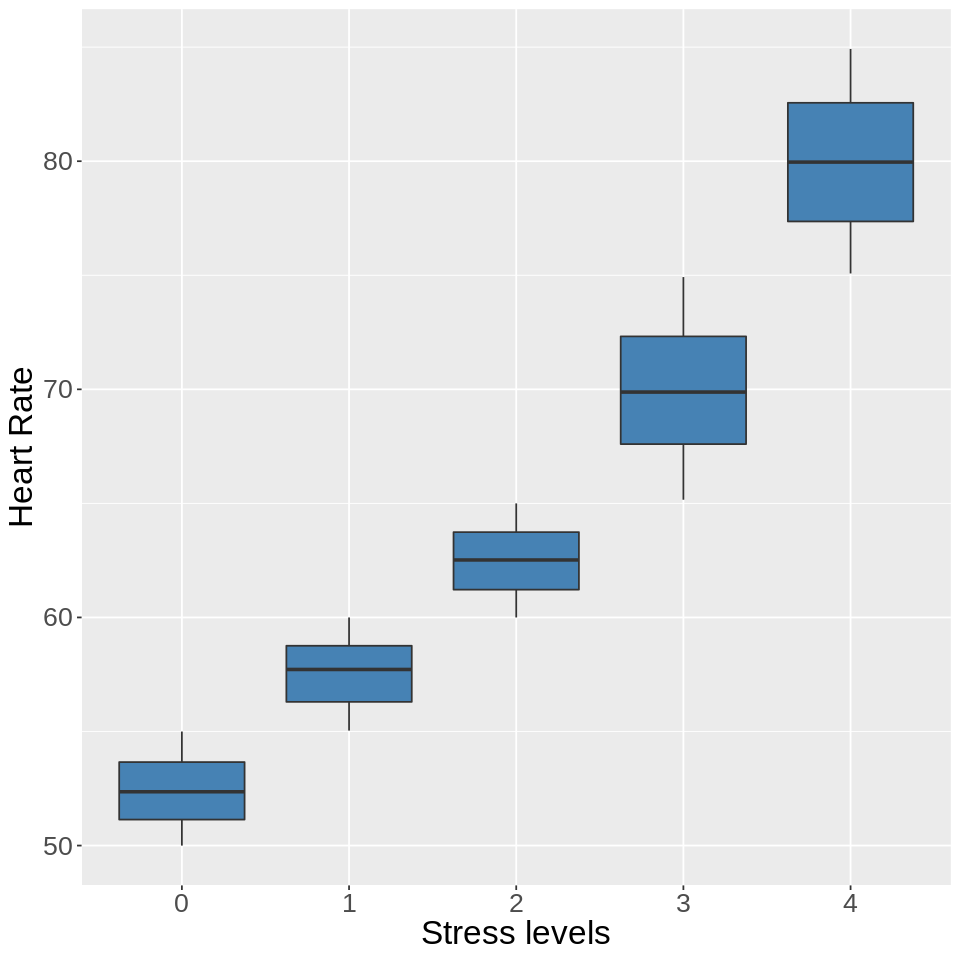

In [35]:
options(repr.plot.width = 8, repr.plot.height = 8) 
sleep_train_plot_1 <- ggplot(sleep_train, aes(x = stress_levels, y = heart_rate))+
geom_boxplot(fill = "steelblue") +
xlab("Stress levels") +
ylab("Heart Rate")+
theme(text=element_text(size=20))
sleep_train_plot_1

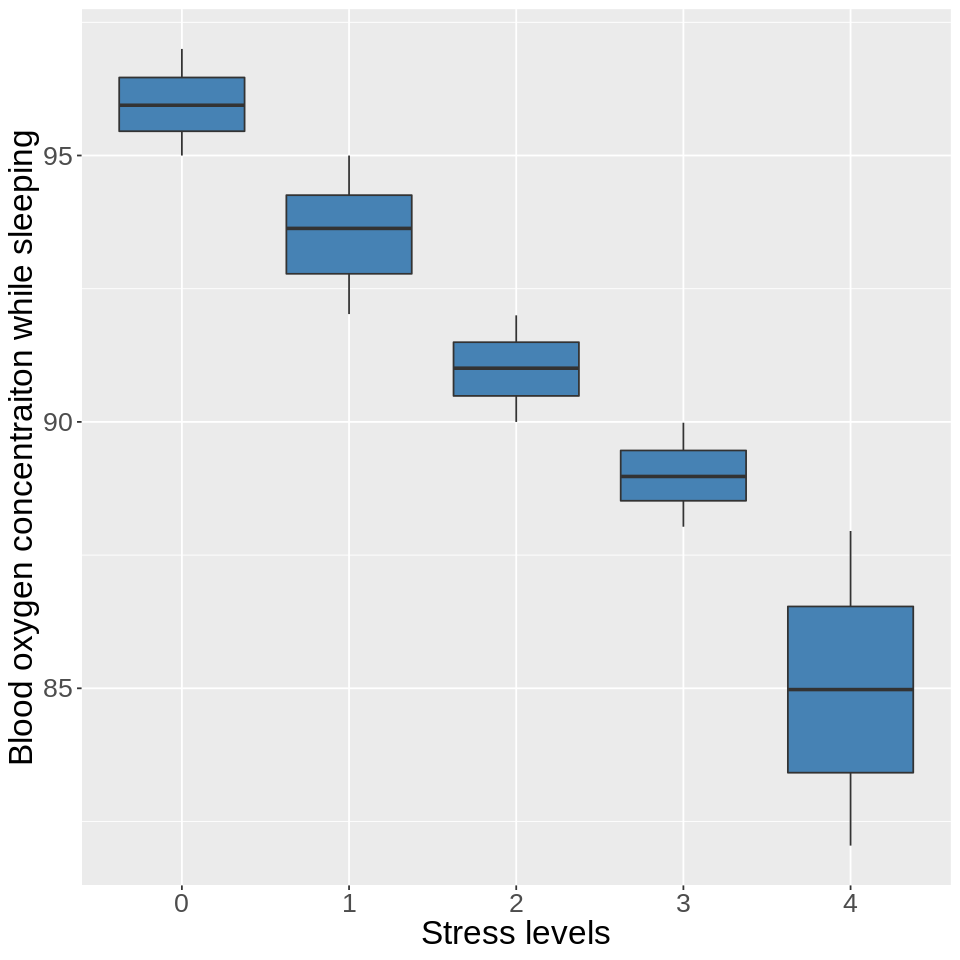

In [36]:
options(repr.plot.width = 8, repr.plot.height = 8) 
sleep_train_plot_2 <- ggplot(sleep_train, aes(x = stress_levels, y = blood_oxygen))+
geom_boxplot(fill = "steelblue") +
xlab("Stress levels") +
ylab("Blood oxygen concentraiton while sleeping")+
theme(text=element_text(size=20))
sleep_train_plot_2

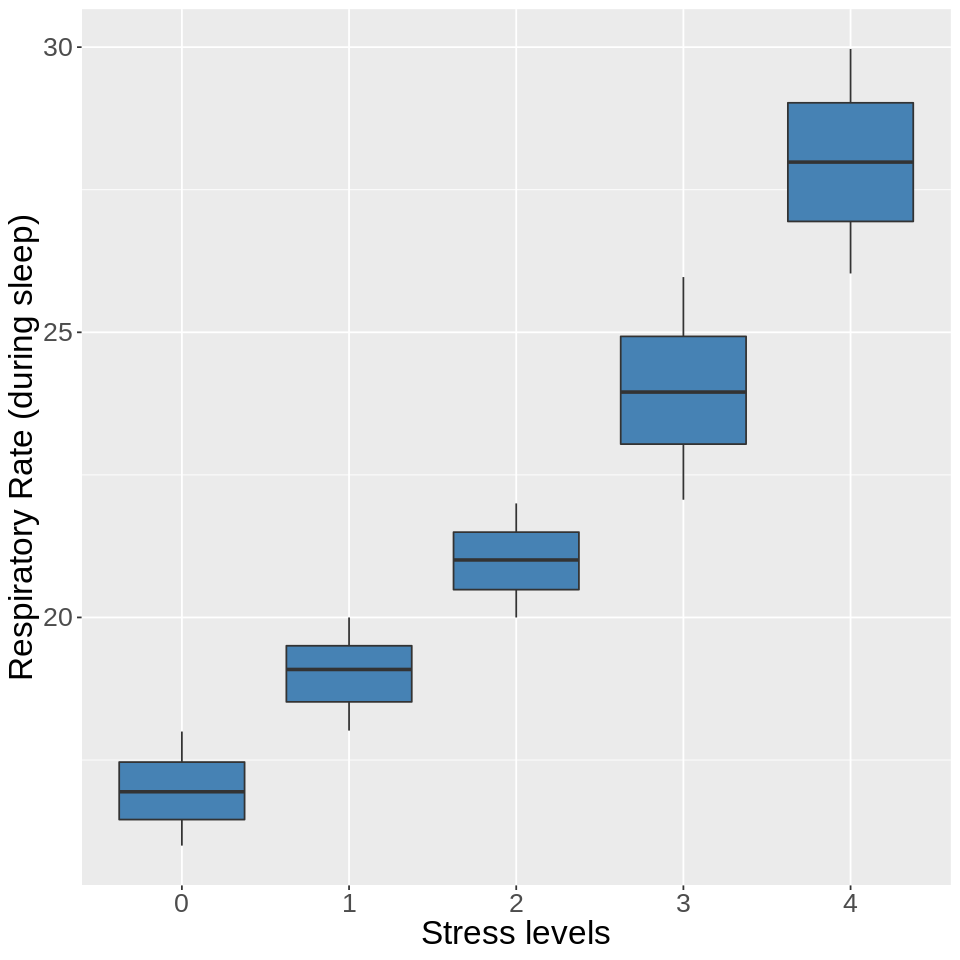

In [37]:
options(repr.plot.width = 8, repr.plot.height = 8) 
sleep_train_plot_3 <- ggplot(sleep_train, aes(x = stress_levels, y = respiratory_rate))+
geom_boxplot(fill = "steelblue") +
labs(x = "Stress levels", y = "Respiratory Rate (during sleep)")+
theme(text=element_text(size=20))
sleep_train_plot_3

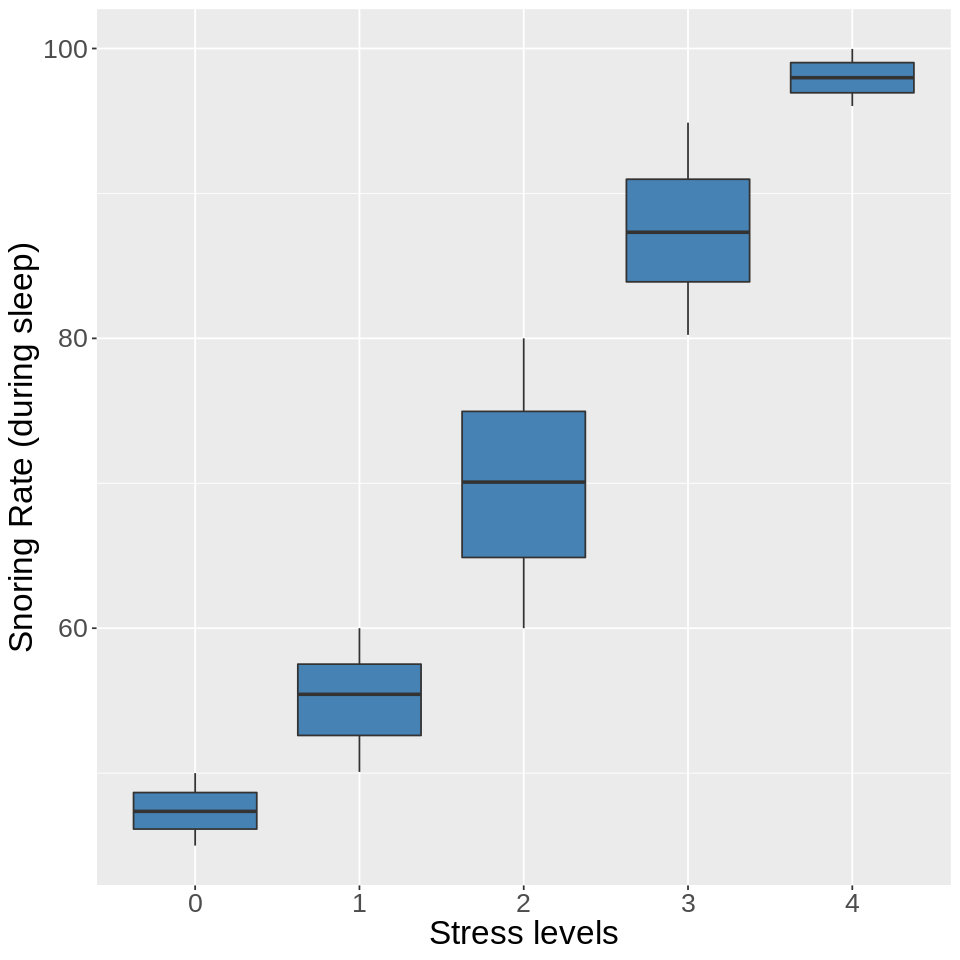

In [38]:
options(repr.plot.width = 8, repr.plot.height = 8) 
sleep_train_plot_4 <- ggplot(sleep_train, aes(x = stress_levels, y = snoring_rate))+
geom_boxplot(fill = "steelblue") +
labs(x = "Stress levels", y = "Snoring Rate (during sleep)")+
theme(text=element_text(size=20))
sleep_train_plot_4

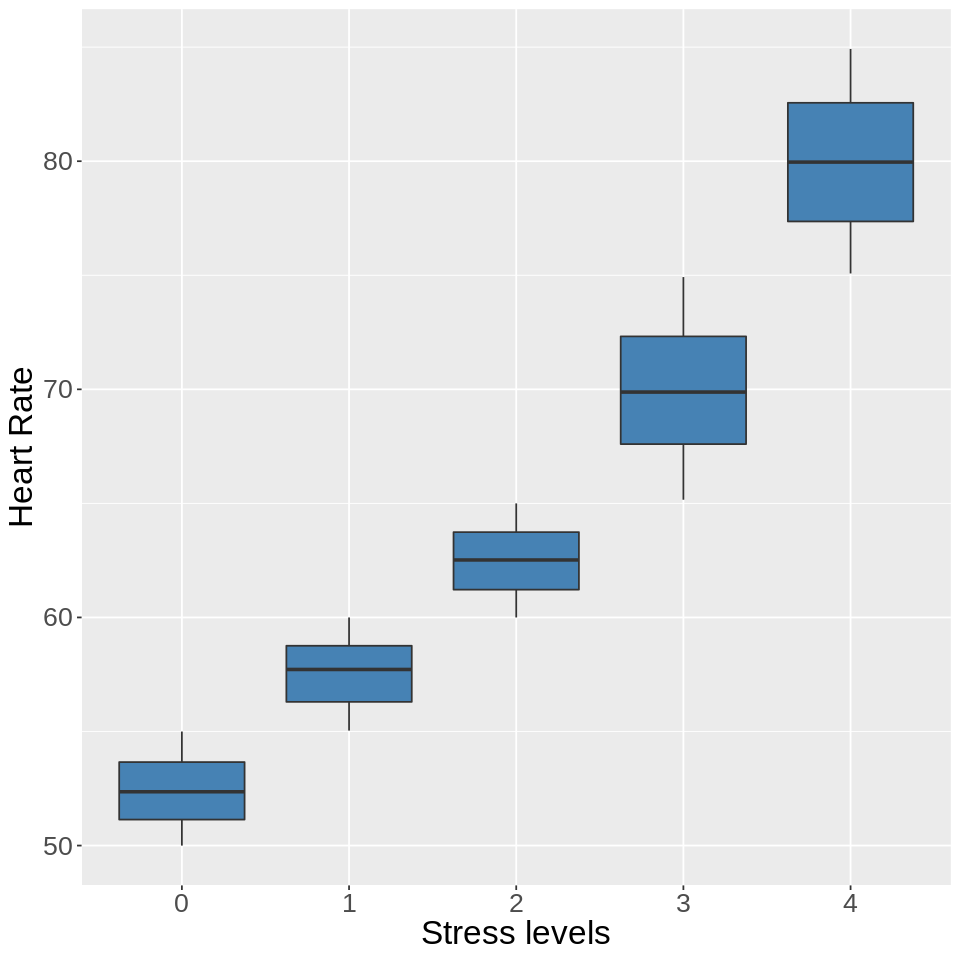

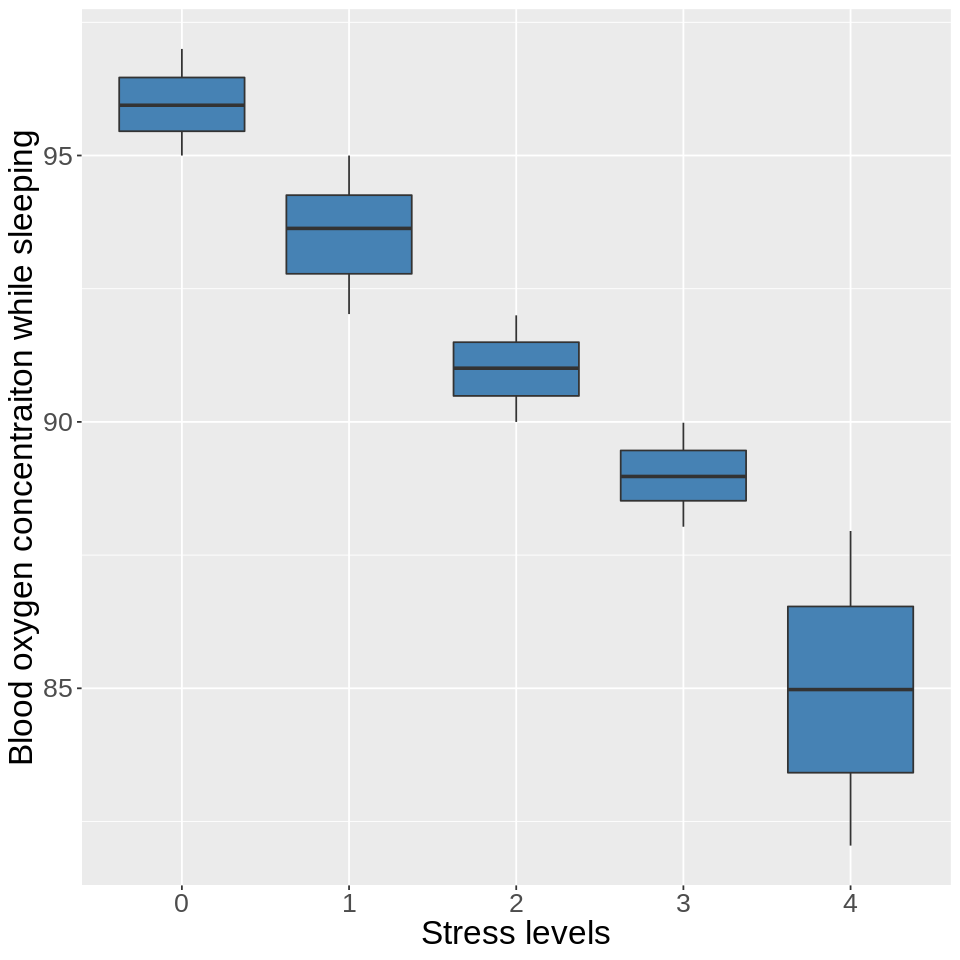

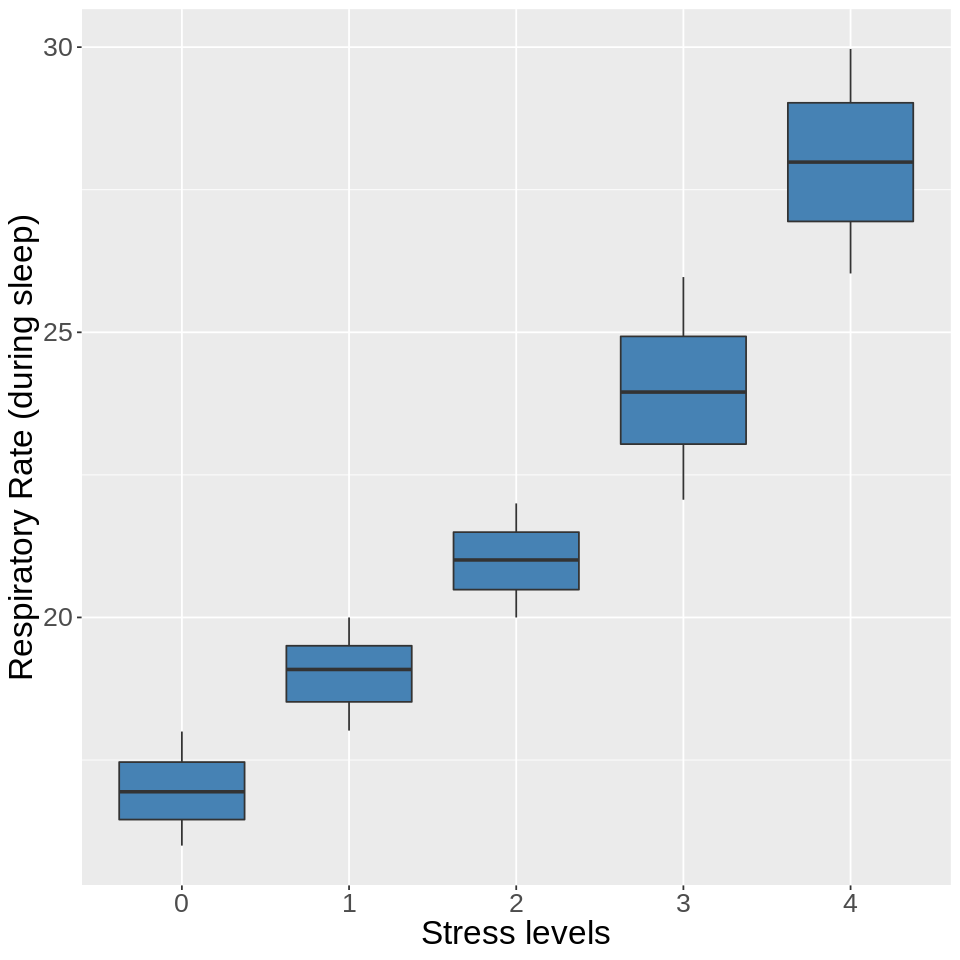

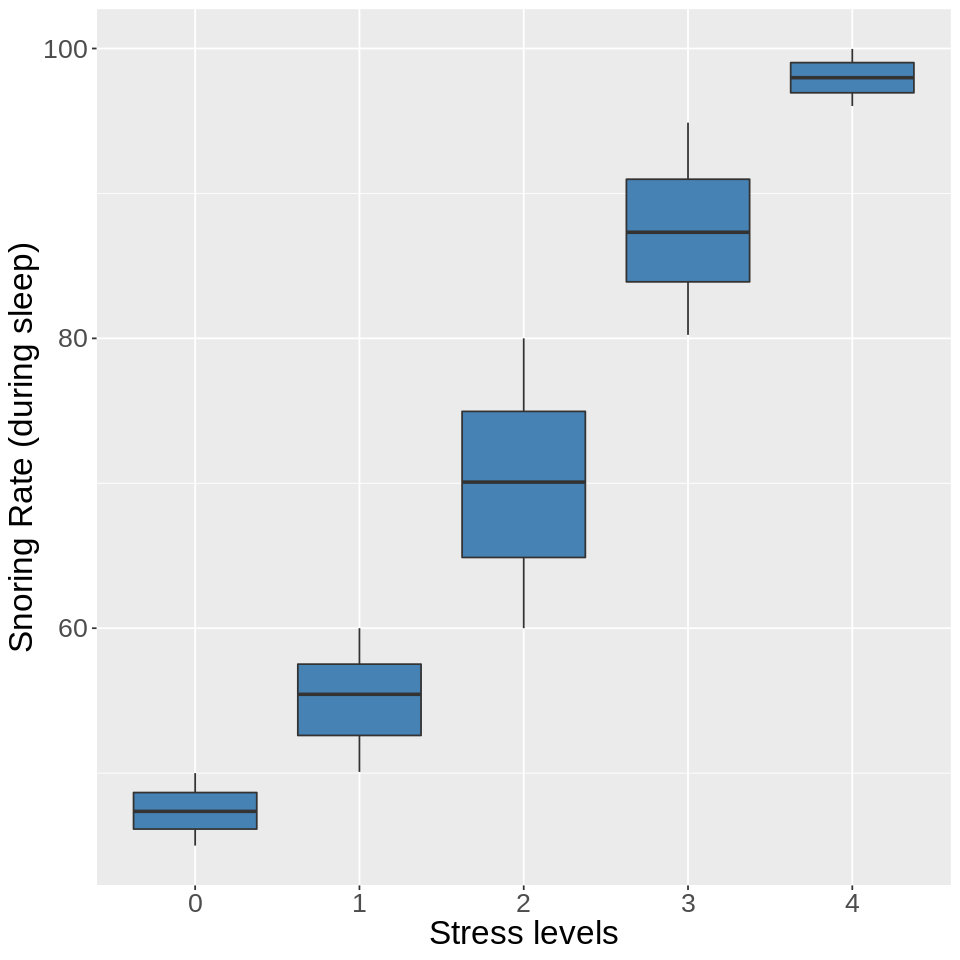

In [39]:
sleep_train_plot_1
sleep_train_plot_2 
sleep_train_plot_3 
sleep_train_plot_4

Methods

To conduct our data analysis, we have selected three suitable predictor variables that all have a strong relationship with stress levels. Based on the findings from the visualization, it was evident that stress levels increase as hours of sleep decrease, stress levels increase as heart rate increases and increases in respiratory rate also result in stress levels increasing. Therefore, our predictor variables are heart rate, respiratory rate and hours of sleep. In order to begin developing a knn classification model, we use our training dataset to preprocess the data by scaling and centering all three of our predictors, followed by creating our classifier using K-nearest neighbor. Next, we will train the classifier with our training set using the workflow() function. After creating our classifier, the last steps would be to predict the stress levels using our test dataset and finally testing our classfier's accuracy to determine the quality of our model.

Expected Outcomes and Significance 


With this experiment, we expect to find that given a set of physiological readings ie. heart rate, snoring rate, and respiration rate, we will be able to accurately assign a number (0-4) corresponding to the level of stress a person goes through in a resting state. 
Using the results of this project we can delve deeper into understanding the human body in terms of how interconnected our involuntary physiological systems are and how they influence and indicate the level of stress our bodies are in. 
Utilizing the results of our analysis, we may be able to pose future questions about the impact other physiological indicators may have on our unconscious stress levels. We may want to explore data on medical drugs that can help stabilize factors that influence a higher level of stress while asleep. To further push the information from our data analysis, we may look into habitual change that may help regulate the physiological response our bodies have due to stressors. Through experimentation, we may be able to collect new data after incorporating new habits to further research the indication that specific physiological responses can give on unconscious stress levels. 